# FigRecipe Demo

Reproducible matplotlib wrapper with mm-precision layouts.

In [1]:
# Setup
import sys

sys.path.insert(0, "../src")

import io
from pathlib import Path

import numpy as np
from PIL import Image, ImageDraw

import figrecipe as fr
import figrecipe.pyplot as plt  # Drop-in replacement for matplotlib.pyplot

%matplotlib inline

output_dir = Path("../outputs/notebook")
output_dir.mkdir(parents=True, exist_ok=True)

def add_border(img, color='#cccccc', width=1):
    """Add subtle border to image to show boundaries."""
    img = img.copy()
    draw = ImageDraw.Draw(img)
    draw.rectangle([0, 0, img.width-1, img.height-1], outline=color, width=width)
    return img

def save_and_compare(fig, path, title="Comparison"):
    """Save figure, close it, then show comparison (Original | Reproduced)."""
    buf1 = io.BytesIO()
    fig.savefig(buf1, format='png', bbox_inches='tight')
    buf1.seek(0)

    image_path, yaml_path, _ = fr.save(fig, path)
    plt.close(fig)

    img1 = add_border(Image.open(buf1))

    fig_rep, _ = fr.reproduce(yaml_path)
    buf2 = io.BytesIO()
    fig_rep.savefig(buf2, format='png', bbox_inches='tight')
    buf2.seek(0)
    img2 = add_border(Image.open(buf2))
    plt.close(fig_rep)

    # Comparison figure (constrained_layout=True is default)
    fig_cmp, axes = plt.subplots(1, 2)
    axes[0].imshow(img1)
    axes[0].set_title('Original', fontweight='bold')
    axes[0].axis('off')
    axes[1].imshow(img2)
    axes[1].set_title('Reproduced', fontweight='bold')
    axes[1].axis('off')
    # fig_cmp.suptitle(title, fontweight='bold')
    plt.show()
    plt.close(fig_cmp)

print(f"figrecipe v{fr.__version__}")

figrecipe v0.4.0


---
## 1. `figrecipe.pyplot` as Drop-in Replacement of `matplotlib.pyplot`

All axes data are automatically recorded.

Saved: ../outputs/notebook/multi_panel.png + ../outputs/notebook/multi_panel.yaml (Reproducible Validation: PASSED)


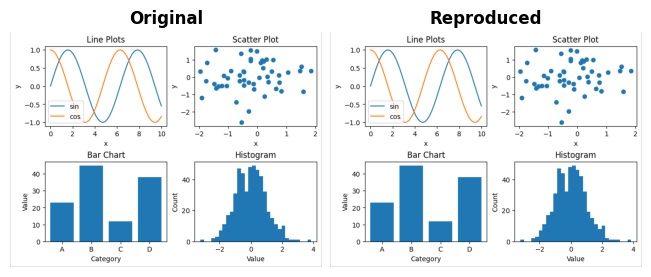

In [2]:

# Unload Style
fr.load_style(None)

fig, axes = plt.subplots(2, 2)  # constrained_layout=True by default
x = np.linspace(0, 10, 50)
np.random.seed(42)

# Line plots
axes[0][0].plot(x, np.sin(x), id='sin')
axes[0][0].plot(x, np.cos(x), id='cos')
axes[0][0].set_xlabel('x')
axes[0][0].set_ylabel('y')
axes[0][0].set_title('Line Plots')
axes[0][0].legend(['sin', 'cos'])

# Scatter
axes[0][1].scatter(np.random.randn(50), np.random.randn(50), id='scatter')
axes[0][1].set_xlabel('x')
axes[0][1].set_ylabel('y')
axes[0][1].set_title('Scatter Plot')

# Bar
axes[1][0].bar(['A', 'B', 'C', 'D'], [23, 45, 12, 38], id='bars')
axes[1][0].set_xlabel('Category')
axes[1][0].set_ylabel('Value')
axes[1][0].set_title('Bar Chart')

# Histogram
axes[1][1].hist(np.random.normal(0, 1, 500), bins=30, id='histogram')
axes[1][1].set_xlabel('Value')
axes[1][1].set_ylabel('Count')
axes[1][1].set_title('Histogram')

save_and_compare(fig, output_dir / 'multi_panel.png', 'Multi-Panel Figure')

---
## 2. MM-Based Layout

Precise millimeter-based dimensions for publication-quality figures.

Figure: 107mm wide, axes: 40x30mm each, spacing: 10mm


Saved: ../outputs/notebook/mm_layout.png + ../outputs/notebook/mm_layout.yaml (Reproducible Validation: PASSED)


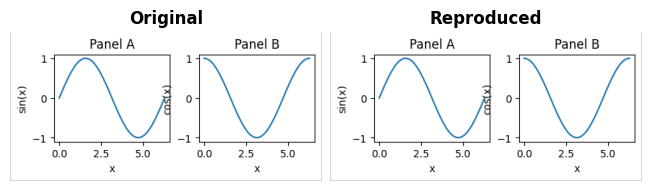

In [3]:
fig, axes = plt.subplots(
    nrows=1, ncols=2,
    axes_width_mm=40,
    axes_height_mm=30,
    margin_left_mm=12,
    margin_bottom_mm=10,
    space_w_mm=10,
)

x = np.linspace(0, 2 * np.pi, 100)
axes[0].plot(x, np.sin(x), id='left')
axes[0].set_xlabel('x')
axes[0].set_ylabel('sin(x)')
axes[0].set_title('Panel A')

axes[1].plot(x, np.cos(x), id='right')
axes[1].set_xlabel('x')
axes[1].set_ylabel('cos(x)')
axes[1].set_title('Panel B')

fig_w = fig.get_figwidth() * 25.4  # inches to mm
print(f'Figure: {fig_w:.0f}mm wide, axes: 40x30mm each, spacing: 10mm')

save_and_compare(fig, output_dir / 'mm_layout.png', 'MM-Based Layout (40x30mm axes)')

---
## 3. Style Presets

Built-in presets: **MATPLOTLIB** (everyday use) and **SCITEX** (Alias: **FIGRECIPE**; publication-quality).

In [4]:
# Compare presets
print('Available:', fr.list_presets())
for name in fr.list_presets():
    style = fr.load_style(name)
    print(f'{name}: {style.axes.width_mm}x{style.axes.height_mm}mm, {style.fonts.axis_label_pt}pt labels')

Available: ['MATPLOTLIB', 'SCITEX']
MATPLOTLIB: NonexNonemm, Nonept labels
SCITEX: 40x28mm, 7pt labels


Saved: ../outputs/notebook/styled.png + ../outputs/notebook/styled.yaml (Reproducible Validation: PASSED)


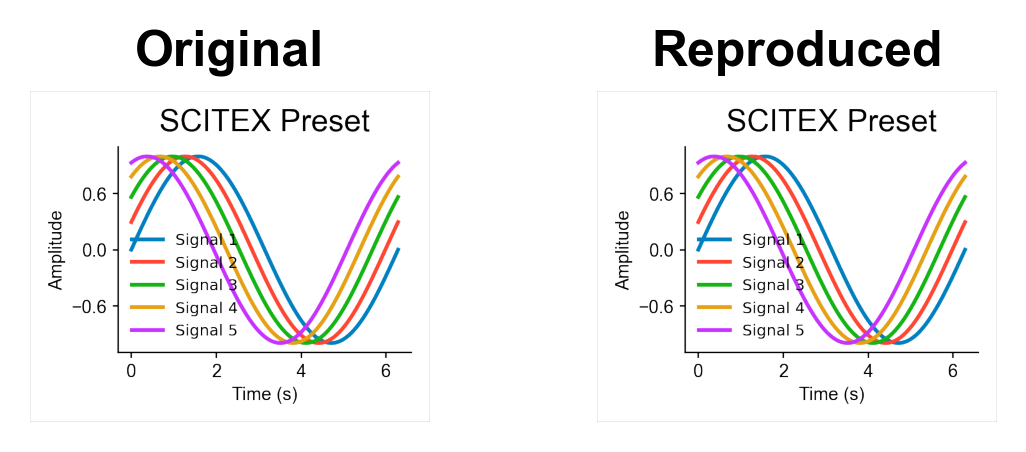

In [5]:
# Load SCITEX preset - style applied GLOBALLY
fr.load_style("SCITEX")

fig, ax = fr.subplots()

x = np.linspace(0, 2 * np.pi, 100)
for i in range(5):
    ax.plot(x, np.sin(x + i * 0.3), label=f'Signal {i+1}', id=f'sig_{i}')

ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('SCITEX Preset')
ax.legend()

save_and_compare(fig, output_dir / 'styled.png', 'Style Preset (Applied Automatically)')

In [6]:
# Color palette - display inline
style = fr.load_style('SCITEX')
colors = style.colors.palette
names = ['blue', 'red', 'green', 'yellow', 'purple', 'lightblue', 'orange', 'pink']
print("SCITEX Palette (RGB):")
for color, name in zip(colors, names):
    print(f"  {name}: {color}")

SCITEX Palette (RGB):
  blue: [0, 128, 192]
  red: [255, 70, 50]
  green: [20, 180, 20]
  yellow: [230, 160, 20]
  purple: [200, 50, 255]
  lightblue: [20, 200, 200]
  orange: [228, 94, 50]
  pink: [255, 150, 200]


---
## 4. Dark Theme

Dark variants are generated at runtime. Use `FIGRECIPE_DARK` or `DEFAULT_DARK`, or pass `dark=True` to `load_style()`.
Same data colors are preserved for scientific integrity - only UI elements change.

Saved: ../outputs/notebook/dark.png + ../outputs/notebook/dark.yaml (Reproducible Validation: PASSED)


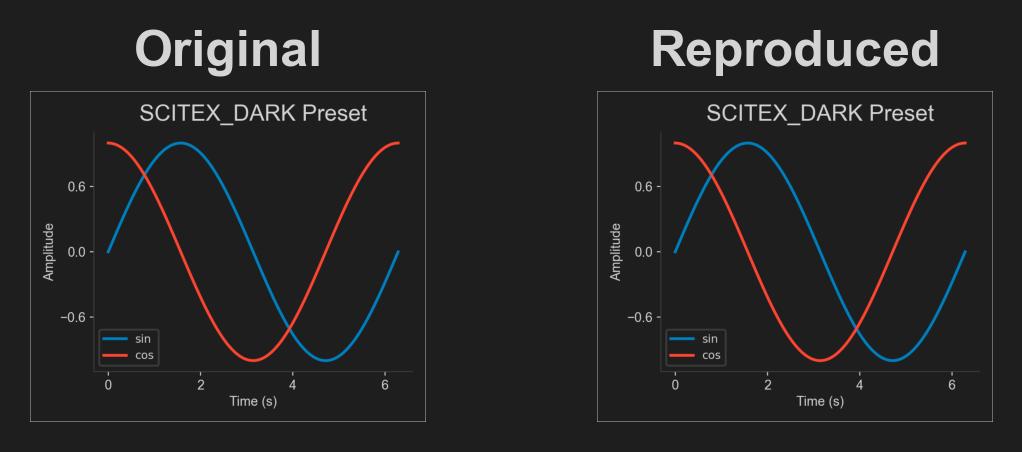

In [7]:
# Load dark preset - style applied GLOBALLY and AUTOMATICALLY
fr.load_style('SCITEX_DARK')

# Create figure - dark theme is applied automatically!
fig, ax = fr.subplots(
    axes_width_mm=60,
    axes_height_mm=45,
)

x = np.linspace(0, 2 * np.pi, 100)
ax.plot(x, np.sin(x), label='sin', id='sin_dark')
ax.plot(x, np.cos(x), label='cos', id='cos_dark')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('SCITEX_DARK Preset')
ax.legend()

save_and_compare(fig, output_dir / 'dark.png', 'Dark Theme (Applied Automatically)')

---
## 5. Seaborn Integration

Use `fr.sns` to record seaborn plots.

Saved: ../outputs/notebook/seaborn.png + ../outputs/notebook/seaborn.yaml (Reproducible Validation: PASSED)


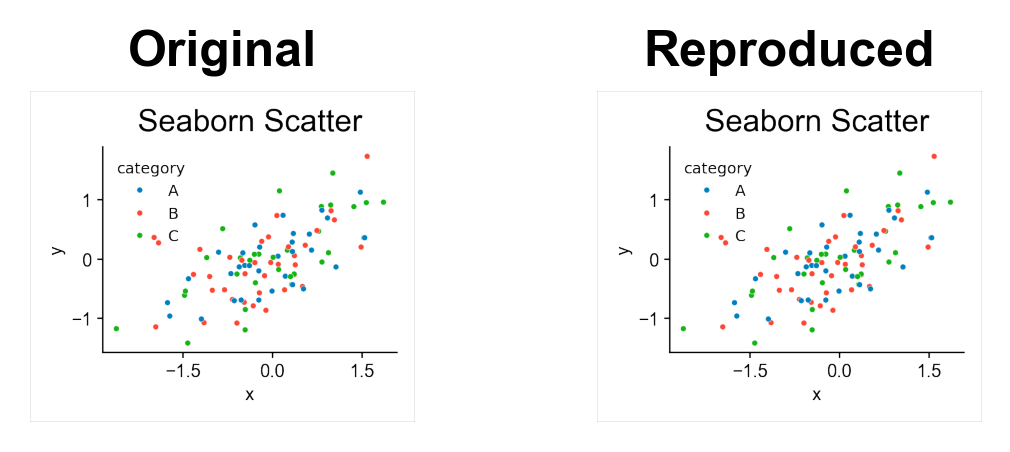

In [8]:
import pandas as pd

# Load SCITEX preset - style applied GLOBALLY
fr.load_style("SCITEX")

np.random.seed(42)
df = pd.DataFrame({
    'x': np.random.randn(100),
    'y': np.random.randn(100),
    'category': np.random.choice(['A', 'B', 'C'], 100),
})
df['y'] = df['x'] * 0.5 + df['y'] * 0.5

fig, ax = fr.subplots()
fr.sns.scatterplot(data=df, x='x', y='y', hue='category',
                   hue_order=['A', 'B', 'C'],
                   ax=ax, id='seaborn_scatter')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Seaborn Scatter')

save_and_compare(fig, output_dir / 'seaborn.png', 'Seaborn Integration')

---
## 6. Recipe Inspection & Data Extraction

In [9]:
# Recipe info
info = fr.info(output_dir / 'multi_panel.yaml')
print(f"ID: {info['id']}")
print(f"Created: {info['created'][:19]}")
print(f"Axes: {info['n_axes']}, Calls: {[c['id'] for c in info['calls'][:4]]}...")

ID: fig_be1e0261
Created: 2025-12-22T13:46:16
Axes: 4, Calls: ['sin', 'cos', 'set_xlabel_000', 'set_ylabel_000']...


In [10]:
# Extract plotted data
data = fr.extract_data(output_dir / 'mm_layout.yaml')
print(f"Extracted plots: {list(data.keys())}")
print(f"left data: x={data['left']['x'][:3]}... y={data['left']['y'][:3]}...")

Extracted plots: ['left', 'right']
left data: x=[0.         0.06346652 0.12693304]... y=[0.         0.06342392 0.12659245]...


---
## 7. Selective Reproduction

Reproduce only specific plots from a recipe.

Saved: ../outputs/notebook/multi_plot.png + ../outputs/notebook/multi_plot.yaml (Reproducible Validation: PASSED)


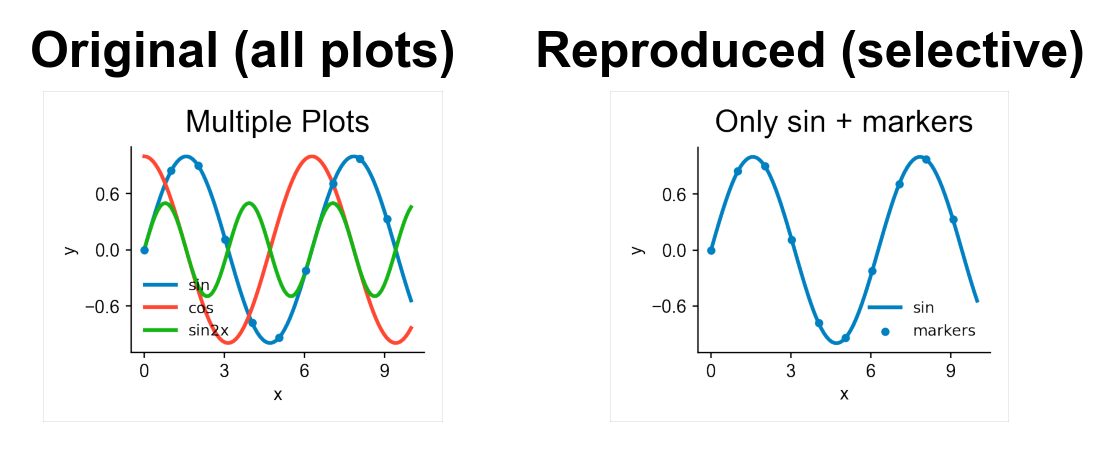

In [11]:
# Load SCITEX preset - style applied GLOBALLY
fr.load_style("SCITEX")

# Create figure with multiple plots
fig, ax = fr.subplots()
x = np.linspace(0, 10, 100)

ax.plot(x, np.sin(x), label='sin', id='sin')
ax.plot(x, np.cos(x), label='cos', id='cos')
ax.plot(x, np.sin(2*x)*0.5, label='sin2x', id='sin2x')
ax.scatter(x[::10], np.sin(x[::10]), zorder=5, id='markers')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Multiple Plots')
ax.legend()

buf1 = io.BytesIO()
fig.savefig(buf1, format='png', bbox_inches='tight', facecolor='white')
buf1.seek(0)
image_path, yaml_path, _ = fr.save(fig, output_dir / 'multi_plot.png')
plt.close(fig)

# Selective reproduction
fig_sub, ax_sub = fr.reproduce(yaml_path, calls=['sin', 'markers'])
ax_sub.set_xlabel('x')
ax_sub.set_ylabel('y')
ax_sub.set_title('Only sin + markers')
ax_sub.legend(['sin', 'markers'])

buf2 = io.BytesIO()
fig_sub.savefig(buf2, format='png', bbox_inches='tight', facecolor='white')
buf2.seek(0)
plt.close(fig_sub)

img1 = add_border(Image.open(buf1))
img2 = add_border(Image.open(buf2))
fig_cmp, axes = plt.subplots(1, 2)
axes[0].imshow(img1)
axes[0].set_title('Original (all plots)', fontweight='bold')
axes[0].axis('off')
axes[1].imshow(img2)
axes[1].set_title('Reproduced (selective)', fontweight='bold')
axes[1].axis('off')
plt.show()
plt.close(fig_cmp)

---
## 8. Crop to Content

Remove background and keep only content with mm-based margin.

Original: 640x480
DPI: 100
Margin: 1.0mm = 4px
Content area: left=1, upper=0, right=640, lower=479
Cropping to: 0,0 -> 640,480
New size: 640x480
Saved 0.0% of original area
Saved to: ../outputs/notebook/before_crop_cropped.jpg


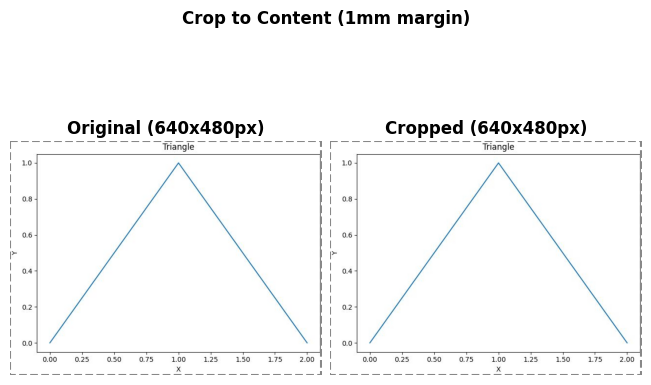

In [12]:
# Unload Style
fr.load_style(None)

# Create figure with whitespace using mm-based layout
fig, ax = fr.subplots()

ax.plot([0, 1, 2], [0, 1, 0], id='triangle')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Triangle')

# Save as JPEG (no alpha) for corner-based background detection
img_path = output_dir / 'before_crop.jpg'
fig.savefig(img_path, format='jpeg')
plt.close(fig)

# Crop to content
cropped_path = fr.crop(img_path, verbose=True)

img_before = Image.open(img_path)
img_after = Image.open(cropped_path)

fig_cmp, axes = plt.subplots(1, 2)
for ax_cmp, img, title in [(axes[0], img_before, f'Original ({img_before.width}x{img_before.height}px)'),
                           (axes[1], img_after, f'Cropped ({img_after.width}x{img_after.height}px)')]:
    ax_cmp.imshow(img)
    ax_cmp.set_title(title, fontweight='bold')
    ax_cmp.axis('off')
    rect = plt.Rectangle((0, 0), img.width-1, img.height-1,
                          fill=False, edgecolor='#888888', linestyle='--', linewidth=1.5)
    ax_cmp.add_patch(rect)

fig_cmp.suptitle('Crop to Content (1mm margin)', fontsize=12, fontweight='bold')
plt.show()
plt.close(fig_cmp)

---
## Summary

| Feature | Usage |
|---------|-------|
| Create | `fr.subplots()` |
| Save | `fr.save(fig, 'figure.png')` → saves image + yaml |
| Reproduce | `fr.reproduce('figure.yaml')` |
| Validate | `fr.validate('figure.yaml')` |
| Inspect | `fr.info('figure.yaml')` |
| Extract data | `fr.extract_data('figure.yaml')` |
| Crop | `fr.crop('figure.png', margin_mm=1.0)` |
| MM layout | `axes_width_mm=`, `margin_left_mm=`, etc. |
| Style | `fr.load_style('SCITEX')` |
| Dark theme | `fr.load_style('SCITEX_DARK')` |
| Seaborn | `fr.sns.scatterplot()` |

In [13]:
print('Generated files:')
for f in sorted(output_dir.glob('*.png')) + sorted(output_dir.glob('*.yaml')):
    print(f'  {f.name}')
plt.close('all')

Generated files:
  dark.png
  mm_layout.png
  multi_panel.png
  multi_plot.png
  seaborn.png
  styled.png
  before_crop.yaml
  dark.yaml
  mm_layout.yaml
  multi_panel.yaml
  multi_plot.yaml
  seaborn.yaml
  styled.yaml
